In [1]:
# Deep Learning Neural Network for the CIFAR-10 dataset
# Nov. 16th 2021
# PBA ML, Sila

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras.datasets import cifar10

In [3]:
NUM_CLASSES = 10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
# Test that it is scaled

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train[5400, 17, 9, 1]

0.27450982

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
# Describe the model that we will use here 

In [11]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                             

In [13]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 148s 94ms/step - loss: 1.5345 - accuracy: 0.4629 - val_loss: 1.3031 - val_accuracy: 0.5458
Epoch 2/10
1563/1563 [==============================] - 157s 100ms/step - loss: 1.1463 - accuracy: 0.5979 - val_loss: 1.0532 - val_accuracy: 0.6205
Epoch 3/10
1563/1563 [==============================] - 154s 99ms/step - loss: 1.0011 - accuracy: 0.6503 - val_loss: 0.9322 - val_accuracy: 0.6734
Epoch 4/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.9158 - accuracy: 0.6801 - val_loss: 0.8852 - val_accuracy: 0.6882
Epoch 5/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.8565 - accuracy: 0.7004 - val_loss: 1.0342 - val_accuracy: 0.6441
Epoch 6/10
1563/1563 [==============================] - 155s 99ms/step - loss: 0.8048 - accuracy: 0.7211 - val_loss: 0.9003 - val_accuracy: 0.6915
Epoch 7/10
1563/1563 [==============================] - 154s 99ms/step - loss: 0.7591 - accuracy: 0.7340 - val_loss: 

In [15]:
#Analysis

In [16]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 6s 547ms/step - loss: 0.8430 - accuracy: 0.7144


[0.8430421948432922, 0.7143999934196472]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [18]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

print(indices)

[6409 8388 7526 1082 7839 6185  864 3967 2346 7636]


In [19]:
# Finally, show results

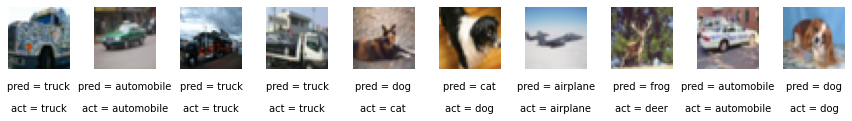

In [20]:
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)